# Jon Williamson

# 425005368

# CSCE 421: Project Coach Tenure Models

## Preprocessing




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [3]:
df = pd.read_csv('master_data.csv', index_col=0)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Avg 2Y Win Pct,Coach Tenure Class
0,Aaron Kromer,2012,45,0,9,0,0,9,0,0,...,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5,0.333333,0
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,0.462366,0.281250,0.225806,0.145161,0.112903,0.000000,0.0,0.0,0.218750,-1
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Feature No.</th>
    <th class="tg-fymr">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1</td>
    <td class="tg-0pky">Age at hiring</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2</td>
    <td class="tg-0pky">Number of times previously hired as head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3</td>
    <td class="tg-0pky">Number of years’ experience as college position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">4</td>
    <td class="tg-0pky">Number of years’ experience as college coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5</td>
    <td class="tg-0pky">Number of years’ experience as college head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">6</td>
    <td class="tg-0pky">Number of years’ experience as NFL position coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">7</td>
    <td class="tg-0pky">Number of years’ experience as NFL coordinator</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8</td>
    <td class="tg-0pky">Number of years’ experience as NFL head coach</td>
  </tr>
  <tr>
    <td class="tg-c3ow">9</td>
    <td class="tg-0pky">Demotion presence in hiring history</td>
  </tr>
  <tr>
    <td class="tg-c3ow">10</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">11</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">12</td>
    <td class="tg-0pky">During years as NFL OC, team’s average normalized giveaway rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">13</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized yardage rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">14</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized point rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">15</td>
    <td class="tg-0pky">During years as NFL DC, team’s average normalized turnover rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">16</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized yardage differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">17</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized point differential rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">18</td>
    <td class="tg-0pky">During years as NFL HC, team’s average normalized turnover ratio rank</td>
  </tr>
  <tr>
    <td class="tg-c3ow">19</td>
    <td class="tg-0pky">Hiring team’s average winning percentage in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">20</td>
    <td class="tg-0pky">Hiring team’s average normalized turnover ratio rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">21</td>
    <td class="tg-0pky">Hiring team’s average normalized point differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">22</td>
    <td class="tg-0pky">Hiring team’s average normalized yard differential rank in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">23</td>
    <td class="tg-0pky">Hiring team’s average divisional placement in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">24</td>
    <td class="tg-0pky">Hiring team’s number of playoff appearances in previous two years</td>
  </tr>
  <tr>
    <td class="tg-c3ow">25</td>
    <td class="tg-0pky">Hiring team’s number of playoff wins in previous two years</td>
  </tr>
</tbody>
</table>

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because coaches are rarely an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 10-18 and 20-23 were normalized based on the number of teams in the rank. Each of these features' original forms was of $x \text{ out of }z$, where $x$ is the rank of the attribute by team out of $z$ total teams. In order to convert this rank to a normalized value, the following equation was used:
$$
f(x,z) = \frac{z-x}{z-1}
$$
This equation linearly distributes score from 1 at the best rank to 0 at the worst rank. For example, a team that places 2nd out of 4 teams in their division is assigned the following score for a single instance of their divisional performance:
$$
f(2,4) = \frac{4-2}{4-1}\\
f(2,4) = \frac{2}{3}\\
f(2,4) \approx .667
$$
This normalization should roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [90]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

In [17]:
df = df[df['Coach Tenure Class'] != -1]
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25
0,45,0,9,0,0,9,0,0,0,NaN,...,NaN,NaN,NaN,0.750000,0.354839,0.903226,0.935484,0.833333,1.0,0.5
1,47,0,0,0,0,12,0,0,0,NaN,...,NaN,NaN,NaN,0.428571,0.360000,0.260000,0.060000,0.166667,0.0,0.0
2,38,0,0,0,0,5,3,0,0,0.752688,...,NaN,NaN,NaN,0.437500,0.516129,0.338710,0.387097,0.166667,0.0,0.0
4,44,0,8,0,12,0,0,0,0,NaN,...,NaN,NaN,NaN,0.400000,0.600000,0.400000,0.400000,0.250000,0.0,0.0
5,25,0,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
y.head(5)

0    0
1    1
2    1
4    0
5    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into four classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5-7</td>
    <td class="tg-0pky">2</td>
  </tr>
  <tr>
    <td class="tg-c3ow">8+</td>
    <td class="tg-0pky">3</td>
  </tr>
</tbody>
</table>

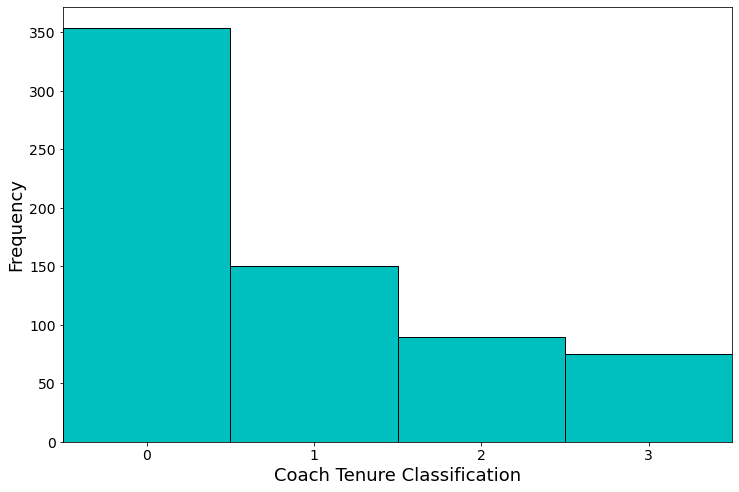

In [39]:
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5,3.5], color='c', edgecolor='k')
plt.xlim(-0.5,3.5)
plt.xticks(ticks=[0,1,2,3])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The 3x3 white boxes in the matrix show that the correlation between Features 10-12 and 13-15 have no correlation. This is expected, as Features 10-12 are based on performance as an offensive coordinator, while features 13-15 are from performance as a defensive coordinator. No coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

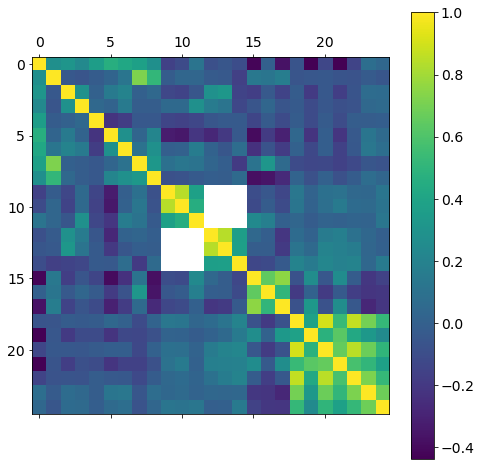

In [40]:
plt.matshow(X.corr())
plt.colorbar()
plt.show()

Holding out 20% of data for testing:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, stratify=y)

## Model 1: Logistic Regression with Lasso Regularization

Necessary Imports:

In [55]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [224]:
log_param_dict = {
    "C":     [.0001, .001, .01, .1, 1, 10, 100, 1000]
}

log_best_params_dict = {key: [] for key in log_param_dict.keys()}

log_result_dict = {     'train_score':  [],
                        'test_score':   [],
                        'coef_':        {
                            0: [],
                            1: [],
                            2: [],
                            3: []
                        }
}

num_of_folds    = 10
max_iter        = 1e6

default_log_params = {
    'verbose':      False,
    'penalty':      'l1',
    'solver':       'saga',
    'n_jobs':       1,
    'multi_class':  'multinomial',
    'max_iter':     max_iter
}

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(LogisticRegression(**default_log_params), param_grid=log_param_dict, n_jobs=-1, cv=5, verbose=1, scoring='roc_auc_ovr_weighted').fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        log_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    log_result_dict['coef_'][0].append(best_model.coef_[0])
    log_result_dict['coef_'][1].append(best_model.coef_[1])
    log_result_dict['coef_'][2].append(best_model.coef_[2])
    log_result_dict['coef_'][3].append(best_model.coef_[3])

    log_result_dict['test_score'].append(roc_auc_score(y_test_, best_model.predict_proba(X_test__), average='weighted', multi_class='ovr'))
    log_result_dict['train_score'].append(roc_auc_score(y_train_, best_model.predict_proba(X_train__), average='weighted', multi_class='ovr'))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.7s finished
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    8.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   16.3s finished
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    8.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.6s finished
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    7.5s remaining:    4.5s


The following code prints the average AUROC value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient for each class-specific regression. 

In [225]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(log_result_dict['train_score']), np.mean(log_result_dict['test_score'])))

Average Train AUROC: 0.678
Average Test AUROC: 0.606


The following code plots the feature importance weights for each class for the ovr in the training method. 

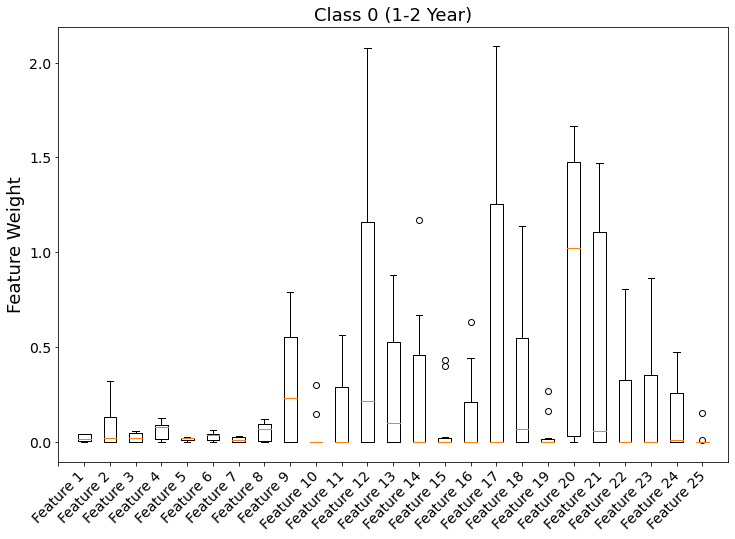

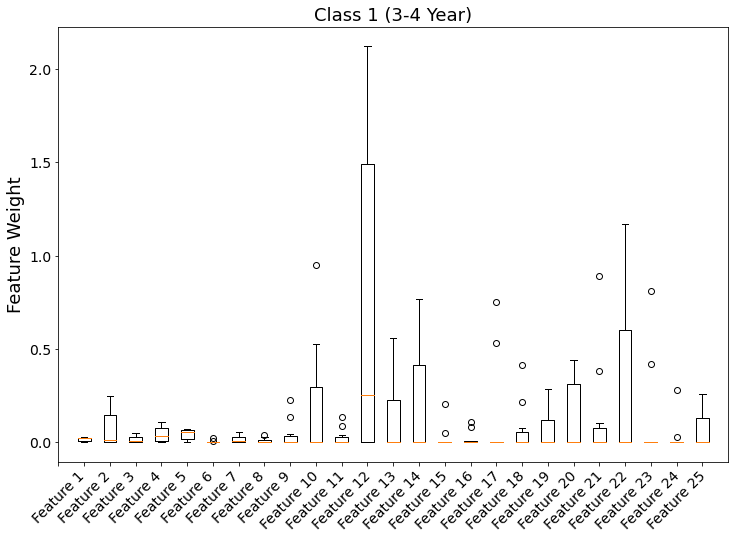

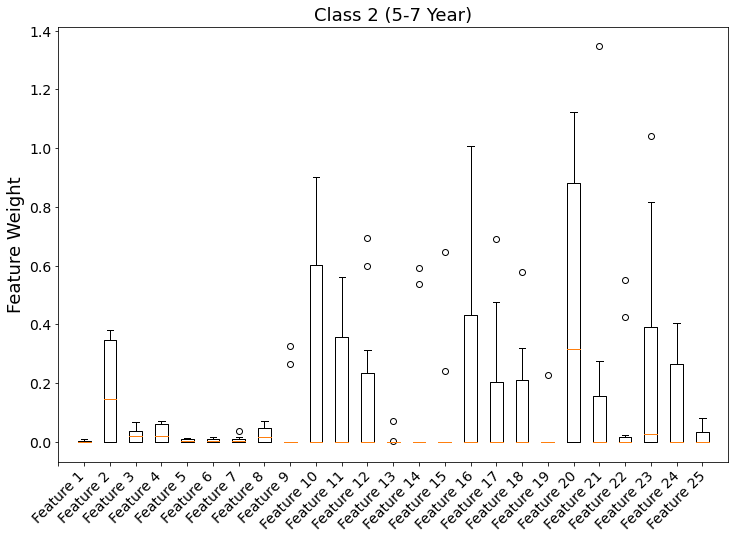

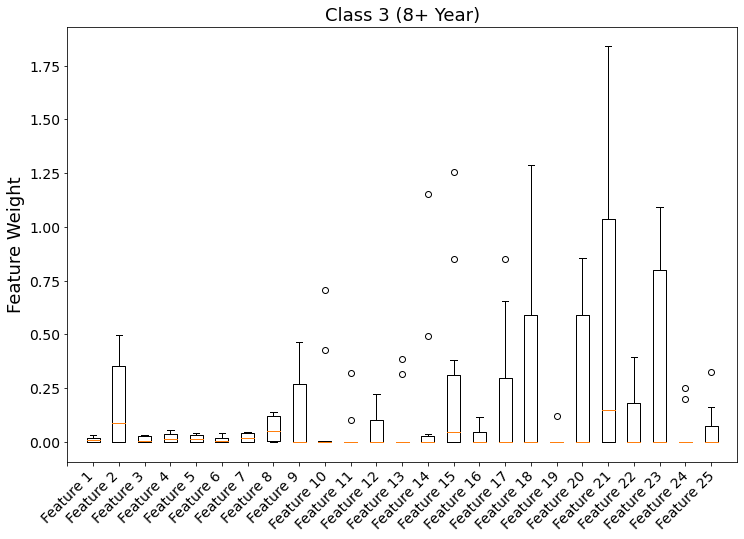

In [226]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    #coef_list.insert(0, np.abs(result_dict['intercept_']))
    label_list = list(X.columns.values)
    #label_list.insert(0, 'Intercept')
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    plt.xticks(np.arange(0, len(label_list)), labels=label_list, rotation='45', )
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()
    
plot_coef(log_result_dict['coef_'][0], 'Class 0 (1-2 Year)')
plot_coef(log_result_dict['coef_'][1], 'Class 1 (3-4 Year)')
plot_coef(log_result_dict['coef_'][2], 'Class 2 (5-7 Year)')
plot_coef(log_result_dict['coef_'][3], 'Class 3 (8+ Year)')

The following code prints the average (non-absolute) values for each ovr regression to compare feature importances across classes.

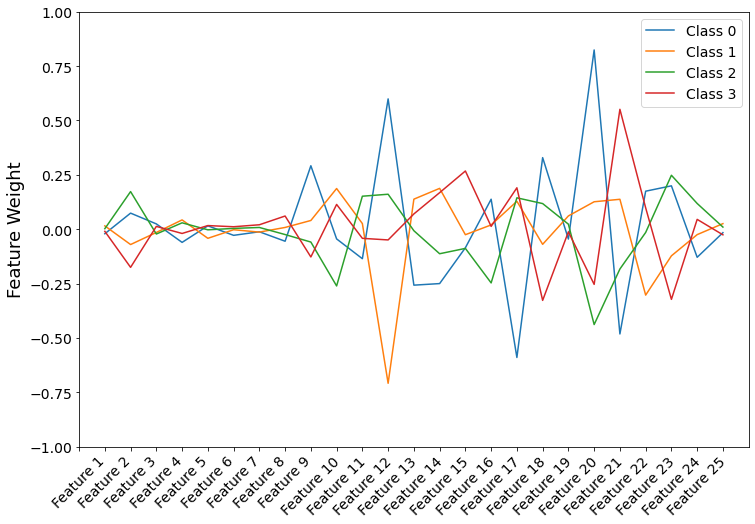

In [237]:
def plot_coefs(coef_list_dict_dict):
    count = 0
    for coef_list_dict in coef_list_dict_dict.values():
        coef_list = [np.mean(l) for l in zip(*coef_list_dict)]
        plt.plot(np.arange(1, len(coef_list) + 1), coef_list, label='Class {}'.format(count))
        count += 1
    label_list = list(X.columns.values)
    label_list.append("")
    plt.xlim(0, len(coef_list) + 1)
    plt.xticks(np.arange(0, len(label_list)), labels=label_list, rotation='45', )
    plt.ylabel('Feature Weight')
    plt.ylim(-1,1)
    plt.legend()
    
plot_coefs(log_result_dict['coef_'])

In [189]:
feature_name_dict = {
    "Feature 1":    "Age at hiring",
    "Feature 2":    "Number of times previously hired as head coach",
    "Feature 3":    "Number of years’ experience as college position coach",
    "Feature 4":    "Number of years’ experience as college coordinator",
    "Feature 5":    "Number of years’ experience as college head coach",
    "Feature 6":    "Number of years’ experience as NFL position coach",
    "Feature 7":    "Number of years’ experience as NFL coordinator",
    "Feature 8":    "Number of years’ experience as NFL head coach",
    "Feature 9":    "Demotion presence in hiring history",
    "Feature 10":   "During years as NFL OC, team’s average normalized yardage rank",
    "Feature 11":   "During years as NFL OC, team’s average normalized point rank",
    "Feature 12":   "During years as NFL OC, team’s average normalized giveaway rank",
    "Feature 13":   "During years as NFL DC, team’s average normalized yardage rank",
    "Feature 14":   "During years as NFL DC, team’s average normalized point rank",
    "Feature 15":   "During years as NFL DC, team’s average normalized turnover rank",
    "Feature 16":   "During years as NFL HC, team’s average normalized yardage differential rank",
    "Feature 17":   "During years as NFL HC, team’s average normalized point differential rank",
    "Feature 18":   "During years as NFL HC, team’s average normalized turnover ratio rank",
    "Feature 19":   "Hiring team’s average winning percentage in previous two years",
    "Feature 20":   "Hiring team’s average normalized turnover ratio rank in previous two years",
    "Feature 21":   "Hiring team’s average normalized point differential rank in previous two years",
    "Feature 22":   "Hiring team’s average normalized yard differential rank in previous two years",
    "Feature 23":   "Hiring team’s average divisional placement in previous two years",
    "Feature 24":   "Hiring team’s number of playoff appearances in previous two years",
    "Feature 25":   "Hiring team’s number of playoff wins in previous two years"
}

The following code prints feature importance rankings for each class. 

In [238]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {} ({}), has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, feature_name_dict[key], key, value, feature_std_weight_dict[key]))
        count += 1

In [229]:
print_feature_importances(log_result_dict['coef_'][0], X.columns.values)

Rank  1: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.8241 with a std. dev. of 0.6888.
Rank  2: During years as NFL OC, team’s average normalized giveaway rank (Feature 12), has an avg. importance of 0.5991 with a std. dev. of 0.7352.
Rank  3: During years as NFL HC, team’s average normalized point differential rank (Feature 17), has an avg. importance of 0.5901 with a std. dev. of 0.8316.
Rank  4: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.4819 with a std. dev. of 0.6127.
Rank  5: During years as NFL HC, team’s average normalized turnover ratio rank (Feature 18), has an avg. importance of 0.3290 with a std. dev. of 0.4259.
Rank  6: Demotion presence in hiring history (Feature 9), has an avg. importance of 0.2916 with a std. dev. of 0.3025.
Rank  7: During years as NFL DC, team’s average normalized yardage rank (Feature 13), has an avg. i

In [236]:
print_feature_importances(log_result_dict['coef_'][1], X.columns.values)

Rank  1: During years as NFL OC, team’s average normalized giveaway rank (Feature 12), has an avg. importance of 0.7088 with a std. dev. of 0.8705.
Rank  2: Hiring team’s average normalized yard differential rank in previous two years (Feature 22), has an avg. importance of 0.3033 with a std. dev. of 0.4046.
Rank  3: During years as NFL DC, team’s average normalized point rank (Feature 14), has an avg. importance of 0.1876 with a std. dev. of 0.2919.
Rank  4: During years as NFL OC, team’s average normalized yardage rank (Feature 10), has an avg. importance of 0.1869 with a std. dev. of 0.3139.
Rank  5: During years as NFL DC, team’s average normalized yardage rank (Feature 13), has an avg. importance of 0.1380 with a std. dev. of 0.2199.
Rank  6: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.1374 with a std. dev. of 0.2758.
Rank  7: During years as NFL HC, team’s average normalized point differential rank (Feat

In [230]:
print_feature_importances(log_result_dict['coef_'][2], X.columns.values)

Rank  1: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.4387 with a std. dev. of 0.4621.
Rank  2: During years as NFL OC, team’s average normalized yardage rank (Feature 10), has an avg. importance of 0.2612 with a std. dev. of 0.3963.
Rank  3: Hiring team’s average divisional placement in previous two years (Feature 23), has an avg. importance of 0.2479 with a std. dev. of 0.3739.
Rank  4: During years as NFL HC, team’s average normalized yardage differential rank (Feature 16), has an avg. importance of 0.2472 with a std. dev. of 0.3905.
Rank  5: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.1832 with a std. dev. of 0.3996.
Rank  6: Number of times previously hired as head coach (Feature 2), has an avg. importance of 0.1728 with a std. dev. of 0.1742.
Rank  7: During years as NFL OC, team’s average normalized giveaway rank (Feature 12), has a

In [231]:
print_feature_importances(log_result_dict['coef_'][3], X.columns.values)

Rank  1: Hiring team’s average normalized point differential rank in previous two years (Feature 21), has an avg. importance of 0.5512 with a std. dev. of 0.6859.
Rank  2: During years as NFL HC, team’s average normalized turnover ratio rank (Feature 18), has an avg. importance of 0.3275 with a std. dev. of 0.4942.
Rank  3: Hiring team’s average divisional placement in previous two years (Feature 23), has an avg. importance of 0.3228 with a std. dev. of 0.4932.
Rank  4: During years as NFL DC, team’s average normalized turnover rank (Feature 15), has an avg. importance of 0.2675 with a std. dev. of 0.4176.
Rank  5: Hiring team’s average normalized turnover ratio rank in previous two years (Feature 20), has an avg. importance of 0.2540 with a std. dev. of 0.3401.
Rank  6: During years as NFL HC, team’s average normalized point differential rank (Feature 17), has an avg. importance of 0.1903 with a std. dev. of 0.3080.
Rank  7: Number of times previously hired as head coach (Feature 2), 

The following code predicts the classes for the held out test set and displays the results. 

In [232]:
plot_pred = None
model = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    model = LogisticRegression(C=np.mean(log_best_params_dict['C'])).fit(X_train__, y_train)
    plot_pred = model.predict(X_test__)

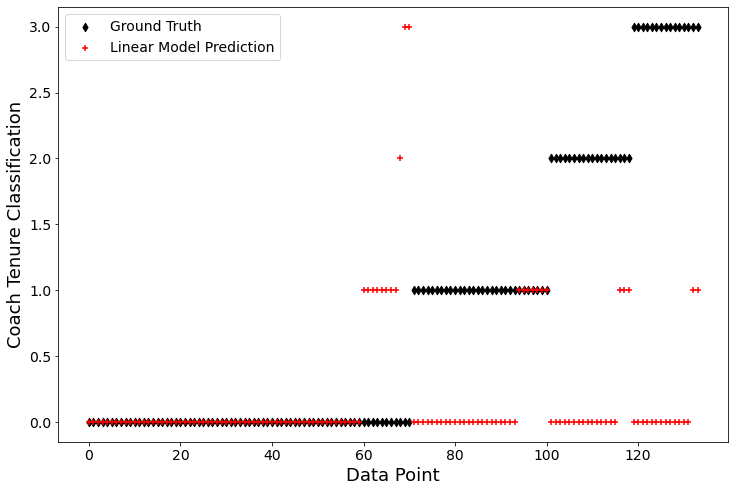

In [233]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='Linear Model Prediction')
plt.xlabel('Data Point')
plt.ylabel('Coach Tenure Classification')
plt.legend()
plt.show()

In [234]:
print('AUROC: {:.3f}'.format(roc_auc_score(y_test, best_model.predict_proba(X_test__), average='weighted', multi_class='ovr')))
print('AUROC When always preidcting class 0: {:.3f}'.format(roc_auc_score(y_test, [[1,0,0,0]] * len(X_test__), average='weighted', multi_class='ovr')))

AUROC: 0.576
AUROC When always preidcting class 0: 0.500


In [235]:
from sklearn.metrics import f1_score
print('F1 Score: {:.3f}'.format(f1_score(y_test, best_model.predict(X_test__), average='weighted')))
print('F1 Score when always preidcting class 0: {:.3f}'.format(f1_score(y_test, [0] * len(X_test__), average='weighted')))

F1 Score: 0.383
F1 Score when always preidcting class 0: 0.367


These results show that the regularized logistic regression tends to predict class 0, the most frequent class, at a disproportionate rate. Nonetheless, the model does have a suurprisingly high weighted AUROC of .576. The AUROC when always predicting class 0 is .500, showing that the logistic regression does provide useful differentiation and adds value to tenure prediction. The F1 metrics support the claim that the logistic regression provides better prediction results even when accounting for class imbalance.

## Model 2: XGBoost Classifier

Necessary Imports:

In [239]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [240]:
"""
xgbr_param_dict = {
    "n_estimators":     [1, 5, 10, 20, 50, 100],
    "learning_rate":    [.01, .05, .1, .15, .2, .25, .3],
    "max_depth":        [2, 4, 6, 8, 10, 12],
    "gamma":            [0, .01, .05, .1],
    "alpha":            [0, .01, .05, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [5, 10, 20],
    "learning_rate":    [.1, .5],
}

xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBClassifier(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='roc_auc_ovr_weighted', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='weighted', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='weighted', multi_class='ovr'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Done  30 out 

In [241]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score']), np.mean(xgbr_result_dict['test_score'])))

Average Train AUROC: 0.897
Average Test AUROC: 0.718


In [242]:
xgbr_best_params_dict

{'n_estimators': [5, 20, 10, 5, 5, 10, 10, 5, 20, 20],
 'learning_rate': [0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1]}

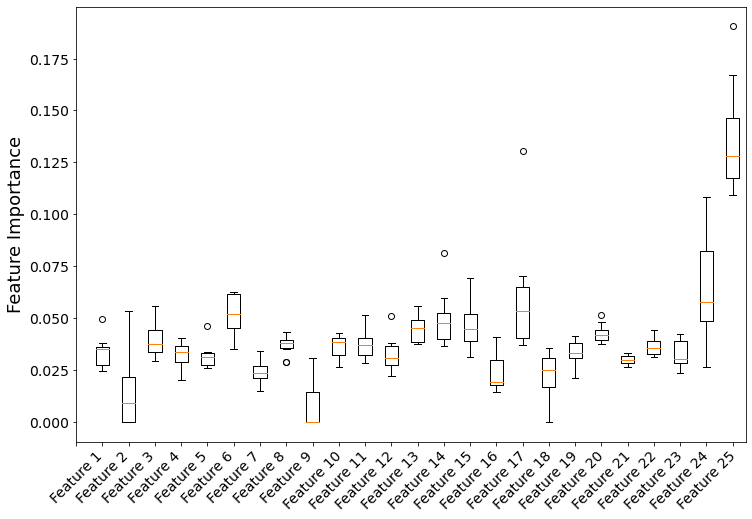

In [243]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = list(X.columns.values)
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(0, len(xgbr_label_list)), labels=xgbr_label_list, rotation='45', )
plt.ylabel('Feature Importance')
plt.show()

In [244]:
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Hiring team’s number of playoff wins in previous two years (Feature 25), has an avg. importance of 0.1364 with a std. dev. of 0.0244.
Rank  2: Hiring team’s number of playoff appearances in previous two years (Feature 24), has an avg. importance of 0.0636 with a std. dev. of 0.0238.
Rank  3: During years as NFL HC, team’s average normalized point differential rank (Feature 17), has an avg. importance of 0.0594 with a std. dev. of 0.0263.
Rank  4: Number of years’ experience as NFL position coach (Feature 6), has an avg. importance of 0.0522 with a std. dev. of 0.0093.
Rank  5: During years as NFL DC, team’s average normalized point rank (Feature 14), has an avg. importance of 0.0498 with a std. dev. of 0.0126.
Rank  6: During years as NFL DC, team’s average normalized turnover rank (Feature 15), has an avg. importance of 0.0472 with a std. dev. of 0.0111.
Rank  7: During years as NFL DC, team’s average normalized yardage rank (Feature 13), has an avg. importance of 0.0447 with

The previously printed RMSE values show that the heavily cross-validated XGBoost does not have a better performance on the testing set than the regularized linear regression. It does, hoowever, show an increased performance on the testing set. This result is surprising, and suggests that the features selected for this model may not be sufficient to accurately predict a team's winning percentage in the first two years following a head coach hire. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [245]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    mean_imputer   = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

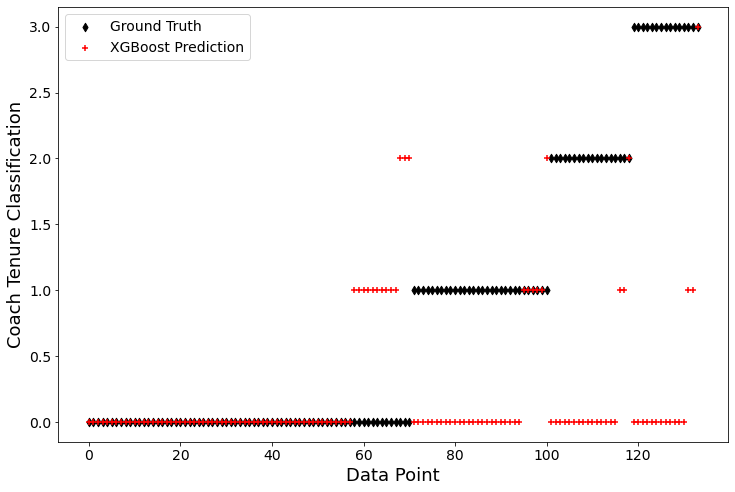

In [246]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point')
plt.ylabel('Coach Tenure Classification')
plt.legend()
plt.show()

In [247]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test__), average='weighted', multi_class='ovr')))

Average AUROC: 0.625


The previous plot shows that the XGBoost model most often predicts the expected value of the winning percentage. Although this result is disappointing, the model's feature importance does provide some useful takeaways. These takeaways will be discussed in more detail in the final report. 

## Model 3: MLPRegressor

Necessary Imports:

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
"""
mlpr_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001, .01],
    "tol":              [1e-4, 1e-5],
    "max_iter":         [200, 300, 400, 500]
}
"""
mlpr_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001]
}

mlpr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

mlpr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}

default_mlpr_params = {
    'solver':       'lbfgs'
}

num_of_folds=2

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPRegressor(**default_mlpr_params), param_grid=mlpr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    #xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    mlpr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    mlpr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))